**Objective: Our Aim is to build A product recoomendation system as well as get insight of market/products for our business approach**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Online_Retail.xlsx to Online_Retail.xlsx


**Import Libraries & Data Overview**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_excel('Online_Retail.xlsx')


Performing EDA on the Dataset

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
df['CustomerID'].isna().sum()

135080

In [ ]:
df = df.dropna(subset=['CustomerID'] )
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Exploratory Data Analysis**

Checking for Duplicate Transactions

In [ ]:
Duplicate = df[df.duplicated()]
Duplicate.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


Number of all the duplicate transactions

In [ ]:
len(Duplicate)

5225

**Number of Unique Products**

In [ ]:
UniqueProd = df['Description'].unique().tolist()

In [ ]:
len(UniqueProd)

3896

**Top Products**

Text(0.5, 1.0, 'Top Products to Target')

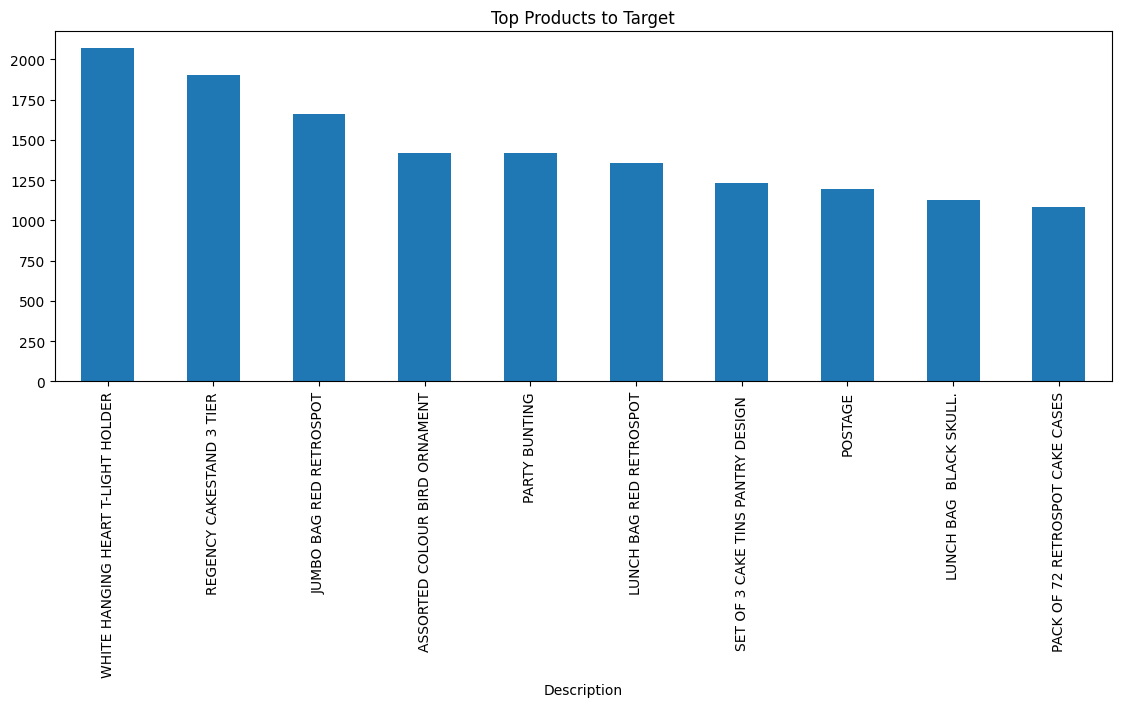

In [ ]:
fig = plt.figure(figsize=(30, 10))
fig.add_subplot(222)
df.groupby(["Description"]).Quantity.count().sort_values(ascending = False)[:10].plot(kind='bar')
plt.title('Top Products to Target')

<ipython-input-151-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

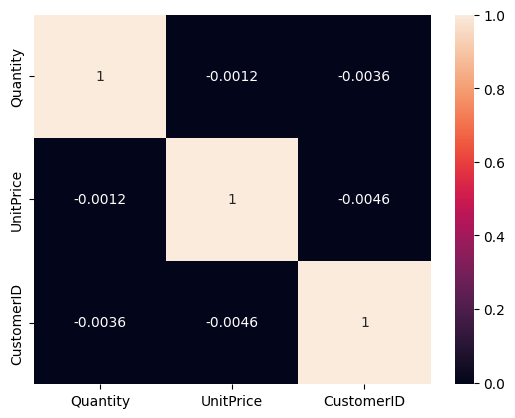

In [ ]:
sns.heatmap(df.corr(), annot=True)

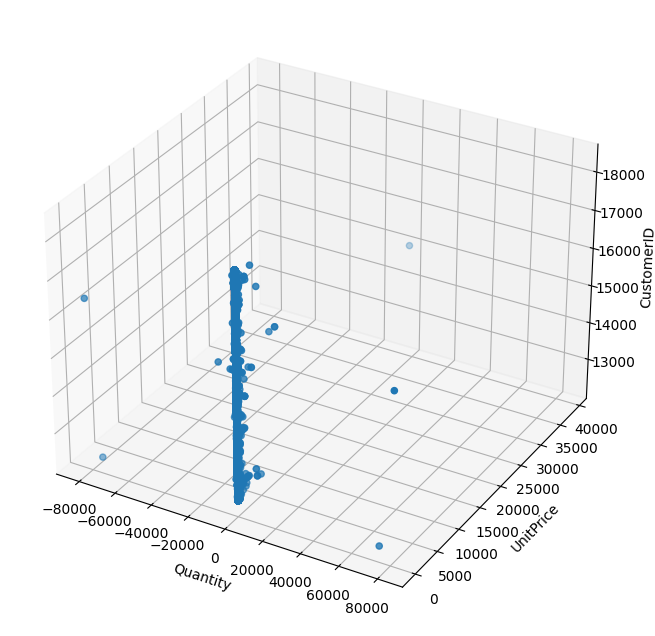

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Quantity'], df['UnitPrice'], df['CustomerID'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('CustomerID')
plt.show()

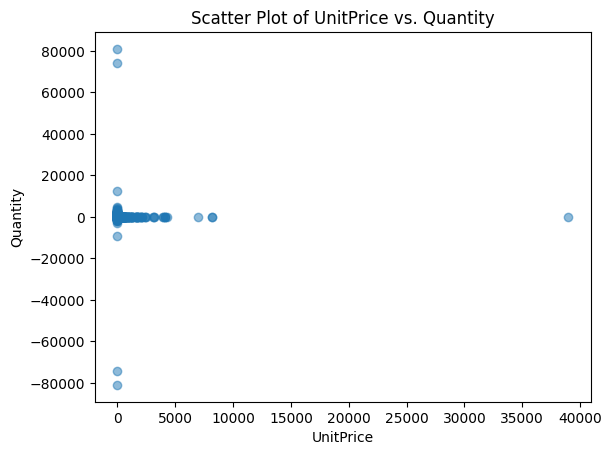

In [ ]:
plt.scatter(df['UnitPrice'], df['Quantity'], alpha=0.5)
plt.title('Scatter Plot of UnitPrice vs. Quantity')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()

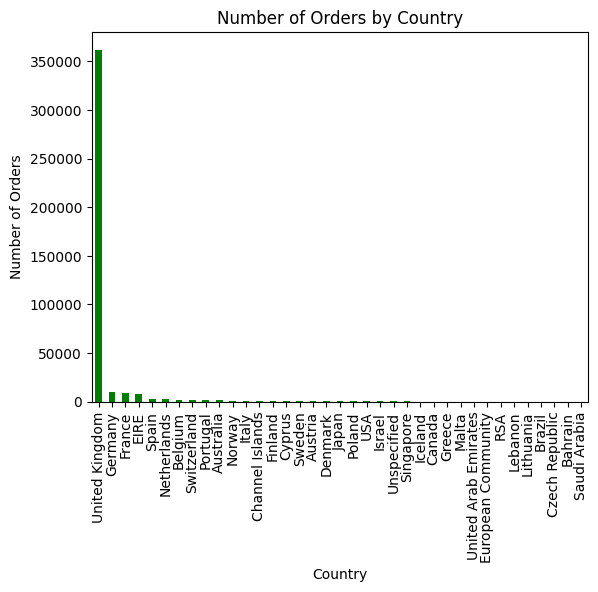

In [ ]:
country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar', color='green')
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.show()

**Buildiing a cosine matrix for Recommendation system**





**DATA PARTITIONING**

In [ ]:
Customer_purchase = df.pivot_table(index='CustomerID', columns='StockCode',values='Quantity')
Customer_purchase.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [ ]:
Customer_purchase = Customer_purchase.applymap(lambda x: 1 if x > 0 else 0)
Customer_purchase.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
CosineMatrix = pd.DataFrame(cosine_similarity(Customer_purchase.T))

In [ ]:
CosineMatrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683
0,1.000000,0.000000,0.094868,0.090351,0.063246,0.098907,0.095346,0.047673,0.076139,0.091050,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.00,0.070057
1,0.000000,1.000000,0.000000,0.032774,0.045883,0.047836,0.000000,0.000000,0.082855,0.049541,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.00,0.000000
2,0.094868,0.000000,1.000000,0.057143,0.060000,0.041703,0.060302,0.060302,0.096309,0.028793,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.000000
3,0.090351,0.032774,0.057143,1.000000,0.042857,0.044682,0.043073,0.000000,0.051594,0.030849,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.071209
4,0.063246,0.045883,0.060000,0.042857,1.000000,0.281494,0.045227,0.060302,0.072232,0.057585,...,0.0,0.0,0.0,0.037139,0.0,0.0,0.0,0.067648,0.05,0.016615


In [ ]:
CosineMatrix.columns = Customer_purchase.T.index
CosineMatrix['StockCode'] = Customer_purchase.T.index
CosineMatrix = CosineMatrix.set_index('StockCode')

In [ ]:
CosineMatrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.063246,0.098907,0.095346,0.047673,0.076139,0.091050,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.00,0.070057
10080,0.000000,1.000000,0.000000,0.032774,0.045883,0.047836,0.000000,0.000000,0.082855,0.049541,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.00,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.060000,0.041703,0.060302,0.060302,0.096309,0.028793,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.000000
10125,0.090351,0.032774,0.057143,1.000000,0.042857,0.044682,0.043073,0.000000,0.051594,0.030849,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.071209
10133,0.063246,0.045883,0.060000,0.042857,1.000000,0.281494,0.045227,0.060302,0.072232,0.057585,...,0.0,0.0,0.0,0.037139,0.0,0.0,0.0,0.067648,0.05,0.016615


In [ ]:
Recommended_items = list( CosineMatrix.loc[10133].sort_values(ascending=False).iloc[:2].index)
Recommended_items

[10133, 20984]

In [ ]:
df.loc[df['StockCode'].isin(Recommended_items),['StockCode', 'Description'] ].drop_duplicates()

,StockCode,Description
741,10133,COLOURING PENCILS BROWN TUBE
4021,20984,12 PENCILS TALL TUBE POSY


User Product Recommendation system

In [ ]:
User_recommendation = pd.DataFrame(
    cosine_similarity(Customer_purchase)
)

In [ ]:
User_recommendation.head()

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
User_recommendation.columns = Customer_purchase.index
User_recommendation['CustomerID'] = Customer_purchase.index
User_recommendation = User_recommendation.set_index('CustomerID')

In [ ]:
User_recommendation.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


**Recommending the Products for the Customer Using Cosine matrix**

In [ ]:
#Items Bought by user 18276.0
User_bought = set(Customer_purchase.loc[18276.0].iloc[Customer_purchase.loc[18276.0].to_numpy().nonzero()].index)
User_bought

{20972,
 22360,
 22492,
 22565,
 22568,
 22865,
 23076,
 23077,
 23085,
 23241,
 23348,
 23434,
 84946}

In [ ]:
recommended_items_list =[]
for x in User_bought:
  Recommended_items = list( CosineMatrix.loc[x].sort_values(ascending=False).iloc[:2].index)
  recommended_items_list.extend(Recommended_items)
unique_recommended_items = list(set(recommended_items_list))

In [ ]:
unique_recommended_items

[22530,
 23434,
 23435,
 23076,
 22565,
 23078,
 23077,
 22566,
 22568,
 22570,
 23085,
 23348,
 85048,
 23241,
 23242,
 22865,
 22866,
 84946,
 84947,
 22360,
 22364,
 22492,
 20971,
 20972,
 22139]

In [ ]:
rec = df.loc[df['StockCode'].isin(unique_recommended_items),['StockCode', 'Description'] ].drop_duplicates().set_index('StockCode')
rec

,Description
StockCode,
22492,MINI PAINT SET VINTAGE
22139,RETROSPOT TEA SET CERAMIC 11 PC
22866,HAND WARMER SCOTTY DOG DESIGN
22865,HAND WARMER OWL DESIGN
22568,FELTCRAFT CUSHION OWL
22570,FELTCRAFT CUSHION RABBIT
22566,FELTCRAFT HAIRBAND PINK AND PURPLE
22565,FELTCRAFT HAIRBANDS PINK AND WHITE
22530,MAGIC DRAWING SLATE DOLLY GIRL


**ML Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
X = df[['Quantity', 'CustomerID']]
y = df['UnitPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1408.5840781114082
R-squared: 5.464974610502882e-05


KNN Model

In [ ]:
product_matrix = df.pivot_table(index='StockCode', columns='InvoiceNo', values='Quantity')
product_matrix = product_matrix.fillna(0)

In [ ]:
X_train, X_test = train_test_split(product_matrix, test_size=0.2, random_state=42)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(X_train)

NearestNeighbors(metric='cosine')

In [ ]:
distances, suggestions = model.kneighbors(X_test)

In [ ]:
for i in range(5):
    print(f"For product {X_test.index[i]} we recommend: {suggestions[i]}")

For product 23267 we recommend: [ 802 2822  185 2705 2797]
For product 84792 we recommend: [ 394  932 1160 1916 1706]
For product 84801B we recommend: [ 734 1791 1155  488 2014]
For product 22467 we recommend: [1980 2725 2860 1568 2187]
For product 21880 we recommend: [ 588 1731   98 2442  522]
